<a href="https://colab.research.google.com/github/younghun-cha/DM_2022/blob/main/ARM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mlxtend

In [ ]:
# apriori 알고리즘
from mlxtend.frequent_patterns import apriori, association_rules
# 연관분석용 데이터 파일 변환
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd
import matplotlib.pyplot as plt

## ARM 수행하기

### 1. 데이터 작성

In [ ]:
# 장바구니 데이터
tran = [['bread', 'milk'],
        ['bread', 'diaper', 'beer', 'eggs'],
        ['milk', 'diaper', 'beer', 'coke'],
        ['bread', 'milk', 'diaper', 'beer'],
        ['bread', 'milk', 'diaper', 'coke']]

In [ ]:
# 데이터 세트를 연관분석이 가능한 배열로 변환 (열은 아이템, 행은 거래건, 셀은 거래 유무)
te = TransactionEncoder()
## fit 함수로 데이터셋은 고유 레이블을 갖고, transform 함수로 파이썬 리스트를 one-hot 인코딩된 numpy 배열로 변환
tran_ar = te.fit(tran).transform(tran)
print(tran_ar)

[[False  True False False False  True]
 [ True  True False  True  True False]
 [ True False  True  True False  True]
 [ True  True False  True False  True]
 [False  True  True  True False  True]]


In [ ]:
# 열이름
print(te.columns_)

['beer', 'bread', 'coke', 'diaper', 'eggs', 'milk']


In [ ]:
# 각 상품명을 열이름으로 하는 데이터 프레임으로 변환
df = pd.DataFrame(tran_ar, columns = te.columns_)
print(df)

    beer  bread   coke  diaper   eggs   milk
0  False   True  False   False  False   True
1   True   True  False    True   True  False
2   True  False   True    True  False   True
3   True   True  False    True  False   True
4  False   True   True    True  False   True


### 2. 탐색적 데이터 분석

In [ ]:
# 각 상품별 거래 빈도
freq = df.sum().to_frame('Frequency')
# 빈도 역순으로 정렬
freq_sort = freq.sort_values('Frequency', ascending = False)
print(freq_sort)

        Frequency
bread           4
diaper          4
milk            4
beer            3
coke            2
eggs            1


In [ ]:
# 지지도 계산 = 각 상품의 거래 빈도 / 총 거래 수
freq_sort['Support'] = freq_sort['Frequency'] / len(df)
print(freq_sort)

        Frequency  Support
bread           4      0.8
diaper          4      0.8
milk            4      0.8
beer            3      0.6
coke            2      0.4
eggs            1      0.2


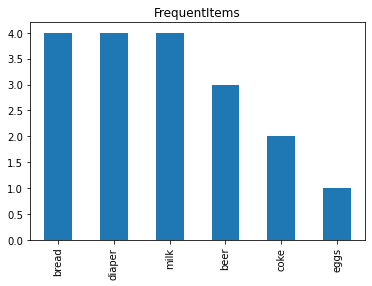

In [ ]:
# 상품별 거래 빈도
freq_sort['Frequency'].plot(kind='bar', title='FrequentItems');

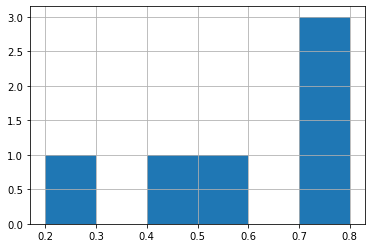

In [ ]:
# 상품 지지도의 히스토그램
freq_sort['Support'].hist(bins=6); # 지지도 0.8 - 3건, 0.4 & 0.6 - 1건, 0.2 - 1건

### 3. 연관규칙 생성

In [ ]:
# 최소 지지도 0.4 빈발항목집합
freq_items = apriori(df, min_support=0.4, use_colnames=True)
print(freq_items)

    support               itemsets
0       0.6                 (beer)
1       0.8                (bread)
2       0.4                 (coke)
3       0.8               (diaper)
4       0.8                 (milk)
5       0.4          (beer, bread)
6       0.6         (beer, diaper)
7       0.4           (milk, beer)
8       0.6        (bread, diaper)
9       0.6          (milk, bread)
10      0.4         (diaper, coke)
11      0.4           (milk, coke)
12      0.6         (milk, diaper)
13      0.4  (beer, diaper, bread)
14      0.4   (milk, beer, diaper)
15      0.4  (milk, bread, diaper)
16      0.4   (milk, diaper, coke)


In [ ]:
# 빈발항목집합에 대하여 최소신뢰도 0.7의 연관규칙마이닝
rules = association_rules(freq_items,
                          metric = 'confidence',
                          min_threshold = 0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(beer),(diaper),0.6,0.8,0.6,1.00,1.250000,0.12,inf
1,(diaper),(beer),0.8,0.6,0.6,0.75,1.250000,0.12,1.6
2,(bread),(diaper),0.8,0.8,0.6,0.75,0.937500,-0.04,0.8
3,(diaper),(bread),0.8,0.8,0.6,0.75,0.937500,-0.04,0.8
4,(milk),(bread),0.8,0.8,0.6,0.75,0.937500,-0.04,0.8
5,(bread),(milk),0.8,0.8,0.6,0.75,0.937500,-0.04,0.8
6,(coke),(diaper),0.4,0.8,0.4,1.00,1.250000,0.08,inf
7,(coke),(milk),0.4,0.8,0.4,1.00,1.250000,0.08,inf
8,(milk),(diaper),0.8,0.8,0.6,0.75,0.937500,-0.04,0.8
9,(diaper),(milk),0.8,0.8,0.6,0.75,0.937500,-0.04,0.8


조건절 항목, 종속절 항목, 조건절 지지도, 종속절 지지도, 지지도, 신뢰도, 향상도(lift), 레버리지, 확신도
* 레버리지 : 리프트의 값이 1보다 크면 양수, 작으면 음수
* 확신도
  - 1이면 X, Y는 서로 독립적
  - 1보다 작으면 X 구매시 Y를 구매하지 않는 거래 건수가 전체 거래에서 Y를 구매하지 않는 거래 수보다 큼 -> X 상품의 구매는 Y 상품의 구매를
방해
  - 1보다 크면 X 구매시 Y를 구매하지 않는 거래 건수가 전체 거래에서 Y를 구매하지 않는 거래 수보다 작음 -> X 상품의 구매는 Y 상품의 구매를
촉진

In [ ]:
# lift가 1보다 큰 양의 관계를 만족하는 연관규칙들을 추출하고,
rules = rules[(rules['lift'] > 1)]
# 신뢰도의 내림차순으로 정렬
rules.sort_values(by = 'confidence', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(beer),(diaper),0.6,0.8,0.6,1.00,1.250000,0.12,inf
6,(coke),(diaper),0.4,0.8,0.4,1.00,1.250000,0.08,inf
7,(coke),(milk),0.4,0.8,0.4,1.00,1.250000,0.08,inf
10,"(beer, bread)",(diaper),0.4,0.8,0.4,1.00,1.250000,0.08,inf
11,"(milk, beer)",(diaper),0.4,0.8,0.4,1.00,1.250000,0.08,inf
12,"(milk, coke)",(diaper),0.4,0.8,0.4,1.00,1.250000,0.08,inf
13,"(diaper, coke)",(milk),0.4,0.8,0.4,1.00,1.250000,0.08,inf
14,(coke),"(milk, diaper)",0.4,0.6,0.4,1.00,1.666667,0.16,inf
1,(diaper),(beer),0.8,0.6,0.6,0.75,1.250000,0.12,1.6


### 4. 결과 분석

In [ ]:
# 조건부에 'diaper'가 있는 규칙
rules[rules.antecedents.apply(lambda x:'diaper' in x)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(diaper),(beer),0.8,0.6,0.6,0.75,1.25,0.12,1.6
13,"(diaper, coke)",(milk),0.4,0.8,0.4,1.00,1.25,0.08,inf


In [ ]:
# 결론부에 'milk'가 있는 규칙
rules[rules.consequents.apply(lambda x:'milk' in x)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
7,(coke),(milk),0.4,0.8,0.4,1.0,1.250000,0.08,inf
13,"(diaper, coke)",(milk),0.4,0.8,0.4,1.0,1.250000,0.08,inf
14,(coke),"(milk, diaper)",0.4,0.6,0.4,1.0,1.666667,0.16,inf


## 실전 예제 : 온라인 유통 상품의 연관성 분석

### 1. 데이터 파일 준비

* UCI Machine learning Repository (https://archive.ics.uci.edu/ml/index.php) --> view all data sets
* Online Retail : 2010.12.1 ~ 2011.12.9 영국의 온라인 매장을 통해 거래된 총 541,909 의 거래
  - 이 데이터에는 결측치가 없음
  - InvoiceNo(거래번호), StockCode(상품코드), Description(상품명), Quantity(주문량), InvoiceDate(거래일시)
  - UnitPrice(단가), CustomerID(고객ID), Country(고객의 거주국가)

In [ ]:
# 데이터 파일 링크
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"
df = pd.read_excel(url)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
df = df[['InvoiceNo', 'Description', 'Quantity', 'UnitPrice']]

### 2. 탐색적 데이터 분석

In [ ]:
# 주문량이 0이하인 거래가 있는지 확인
df[df['Quantity'] <= 0]

,InvoiceNo,Description,Quantity,UnitPrice
141,C536379,Discount,-1,27.50
154,C536383,SET OF 3 COLOURED FLYING DUCKS,-1,4.65
235,C536391,PLASTERS IN TIN CIRCUS PARADE,-12,1.65
236,C536391,PACK OF 12 PINK PAISLEY TISSUES,-24,0.29
237,C536391,PACK OF 12 BLUE PAISLEY TISSUES,-24,0.29
...,...,...,...,...
540449,C581490,ZINC T-LIGHT HOLDER STARS SMALL,-11,0.83
541541,C581499,Manual,-1,224.69
541715,C581568,VICTORIAN SEWING BOX LARGE,-5,10.95
541716,C581569,HANGING HEART JAR T-LIGHT HOLDER,-1,1.25


In [ ]:
# 주문량이 0보다 큰 거래만 추출
df = df[df['Quantity'] > 0]
df

,InvoiceNo,Description,Quantity,UnitPrice
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55
1,536365,WHITE METAL LANTERN,6,3.39
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2.75
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,3.39
...,...,...,...,...
541904,581587,PACK OF 20 SPACEBOY NAPKINS,12,0.85
541905,581587,CHILDREN'S APRON DOLLY GIRL,6,2.10
541906,581587,CHILDRENS CUTLERY DOLLY GIRL,4,4.15
541907,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15


In [ ]:
# 거래별 상품명별 수량 합계 (하나의 거래에 동일한 품목이 있는 경우가 있어 그룹별로 합을 구함)
df = df.groupby(['InvoiceNo', 'Description'])['Quantity'].sum()
df

InvoiceNo  Description                        
536365     CREAM CUPID HEARTS COAT HANGER          8
           GLASS STAR FROSTED T-LIGHT HOLDER       6
           KNITTED UNION FLAG HOT WATER BOTTLE     6
           RED WOOLLY HOTTIE WHITE HEART.          6
           SET 7 BABUSHKA NESTING BOXES            2
                                                  ..
581587     PLASTERS IN TIN STRONGMAN              12
           SPACEBOY LUNCH BOX                     12
A563185    Adjust bad debt                         1
A563186    Adjust bad debt                         1
A563187    Adjust bad debt                         1
Name: Quantity, Length: 519974, dtype: int64

In [ ]:
# 데이터프레임의 구조변경
## 1열 InvoiceNo는 행으로, 2열 Description(상품명)은 열로, 3열 수량은 행렬의 성분으로
df = df.unstack()
df

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,returned,taig adjust,test,to push order througha s stock was,website fixed,wrongly coded 20713,wrongly coded 23343,wrongly marked,wrongly marked 23343,wrongly sold (22719) barcode
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
581587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A563185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


행과 열에 해당되지 않는 성분은 NaN으로 표기됨

In [ ]:
# 각 셀의 수량이 1이상이면 1로, NaN이면 0으로 변환
## 함수 : 전달되는 x값들을 조건에 따라 0, 1로 반환
def encode_units(x):
    if x >= 1: return 1
    else: return 0
    
## df 데이터세트에 대해 encode_units 함수 적용
df = df.applymap(encode_units)
df

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,returned,taig adjust,test,to push order througha s stock was,website fixed,wrongly coded 20713,wrongly coded 23343,wrongly marked,wrongly marked 23343,wrongly sold (22719) barcode
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581586,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581587,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A563185,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 각 열별로 합하고 내림차순으로 정렬하여 가장 많은 수량으로 거래된 상품명 확인하기
## 아이템별 빈도 및 항목명 설정
freq = df.sum(axis=0).to_frame('Frequency')
## 빈도의 내림차순 정렬
freq_sort = freq.sort_values('Frequency', ascending=False)

freq_sort

,Frequency
Description,
WHITE HANGING HEART T-LIGHT HOLDER,2260
JUMBO BAG RED RETROSPOT,2092
REGENCY CAKESTAND 3 TIER,1989
PARTY BUNTING,1686
LUNCH BAG RED RETROSPOT,1564
...,...
DOORKNOB CERAMIC IVORY,1
SET/4 2 TONE EGG SHAPE MIXING BOWLS,1
DUSTY PINK CHRISTMAS TREE 30CM,1


In [ ]:
# 빈도수가 1인 항목 제외
freq_sort = freq_sort[freq_sort['Frequency'] > 1]
freq_sort

,Frequency
Description,
WHITE HANGING HEART T-LIGHT HOLDER,2260
JUMBO BAG RED RETROSPOT,2092
REGENCY CAKESTAND 3 TIER,1989
PARTY BUNTING,1686
LUNCH BAG RED RETROSPOT,1564
...,...
BLACK FLOWER CANDLE PLATE,2
PINK FLUFFY CHRISTMAS DECORATION,2
VINTAGE BEAD PINK SHADE,2


In [ ]:
# 단일 상품별 지지도
freq_sort['Support'] = freq_sort['Frequency'] / len(freq_sort)
freq_sort

C:\Users\USER\AppData\Local\Temp/ipykernel_2488/3301076765.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freq_sort['Support'] = freq_sort['Frequency'] / len(freq_sort)


,Frequency,Support
Description,,
WHITE HANGING HEART T-LIGHT HOLDER,2260,0.583979
JUMBO BAG RED RETROSPOT,2092,0.540568
REGENCY CAKESTAND 3 TIER,1989,0.513953
PARTY BUNTING,1686,0.435659
LUNCH BAG RED RETROSPOT,1564,0.404134
...,...,...
BLACK FLOWER CANDLE PLATE,2,0.000517
PINK FLUFFY CHRISTMAS DECORATION,2,0.000517
VINTAGE BEAD PINK SHADE,2,0.000517


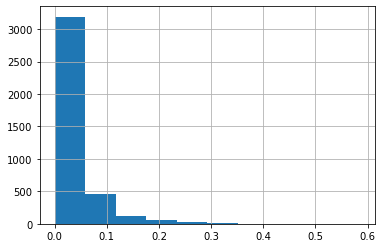

In [ ]:
# 지지도 분포
freq_sort['Support'].hist();

### 3. 연관규칙 생성

In [ ]:
# 최소 지지도 0.01 (메모리 오류 발생시 0.05부터 조정할 것)
freq_items = apriori(df, min_support=0.02, use_colnames=True)
freq_items

,support,itemsets
0,0.023242,(3 STRIPEY MICE FELTCRAFT)
1,0.024037,(4 TRADITIONAL SPINNING TOPS)
2,0.047427,(6 RIBBONS RUSTIC CHARM)
3,0.021702,(60 CAKE CASES DOLLY GIRL DESIGN)
4,0.030691,(60 CAKE CASES VINTAGE CHRISTMAS)
...,...,...
370,0.020262,"(WHITE HANGING HEART T-LIGHT HOLDER, WOODEN PI..."
371,0.026768,"(WOODEN FRAME ANTIQUE WHITE , WOODEN PICTURE F..."
372,0.026917,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY..."
373,0.020262,"(REGENCY CAKESTAND 3 TIER, GREEN REGENCY TEACU..."


In [ ]:
# 최소 신뢰도 0.6 으로 연관규칙 생성
rules = association_rules(freq_items, metric='confidence', min_threshold=0.6)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.052195,0.048669,0.031784,0.608944,12.511932,0.029244,2.432722
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.048669,0.052195,0.031784,0.653061,12.511932,0.029244,2.731908
2,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED ),0.038886,0.052195,0.023341,0.600255,11.500231,0.021312,2.371026
3,(CHARLOTTE BAG PINK POLKADOT),(RED RETROSPOT CHARLOTTE BAG),0.036899,0.051351,0.025924,0.702557,13.681520,0.024029,3.189350
4,(DOLLY GIRL LUNCH BOX),(SPACEBOY LUNCH BOX ),0.042213,0.044696,0.026718,0.632941,14.161004,0.024832,2.602591
5,(DOTCOM POSTAGE),(JUMBO BAG RED RETROSPOT),0.035161,0.103894,0.024086,0.685028,6.593561,0.020433,2.845038
6,(GARDENERS KNEELING PAD CUP OF TEA ),(GARDENERS KNEELING PAD KEEP CALM ),0.037644,0.045342,0.027116,0.720317,15.886413,0.025409,3.413354
7,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.038041,0.050407,0.031436,0.826371,16.393893,0.029519,5.469083
8,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.050407,0.038041,0.031436,0.623645,16.393893,0.029519,2.555990
9,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.050407,0.052940,0.038141,0.756650,14.292598,0.035472,3.891765


In [ ]:
# 향상도가 1보다 큰 연관규칙들을 추출하고, 신뢰도의 내림차순으로 정렬
rules = rules[rules['lift'] > 1]
rules.sort_values(by='confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
25,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.029748,0.050407,0.026917,0.904841,17.950627,0.025417,9.979054
24,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",(ROSES REGENCY TEACUP AND SAUCER ),0.031436,0.052940,0.026917,0.856240,16.173782,0.025253,6.587791
7,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.038041,0.050407,0.031436,0.826371,16.393893,0.029519,5.469083
30,"(JUMBO BAG PINK POLKADOT, JUMBO STORAGE BAG SUKI)",(JUMBO BAG RED RETROSPOT),0.025576,0.103894,0.020511,0.801942,7.718881,0.017853,4.524459
28,"(REGENCY CAKESTAND 3 TIER, GREEN REGENCY TEACU...",(ROSES REGENCY TEACUP AND SAUCER ),0.025278,0.052940,0.020262,0.801572,15.141133,0.018924,4.772807
20,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.038041,0.052940,0.029748,0.781984,14.771141,0.027734,4.344000
29,"(REGENCY CAKESTAND 3 TIER, ROSES REGENCY TEACU...",(GREEN REGENCY TEACUP AND SAUCER),0.026073,0.050407,0.020262,0.777143,15.417289,0.018948,4.260993
9,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.050407,0.052940,0.038141,0.756650,14.292598,0.035472,3.891765
10,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.052940,0.050407,0.038141,0.720450,14.292598,0.035472,3.396865
6,(GARDENERS KNEELING PAD CUP OF TEA ),(GARDENERS KNEELING PAD KEEP CALM ),0.037644,0.045342,0.027116,0.720317,15.886413,0.025409,3.413354


결과 분석에서 "조건부에 'diaper'가 있는 규칙"의 코드를 수정하여 분석해 보자.